In [230]:
import snn
from snn import neuralNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
import importlib
importlib.reload(snn)

<module 'snn' from '/home/jean-phi/Projects/Machine-Learning/Simple_Neural_Network/snn.py'>

# Read the data from the file

In [232]:
df = pd.read_csv("./MNIST_dataset/mnist_train_100.csv", sep=',', header=None)

# Create the neural network

In [233]:
nn = neuralNetwork(784, 100, 10)

# Prepare the data

## Extract the target output

In [234]:
array_targetData = df.loc[:, 0].values

## Normalize the input

In [235]:
array_inputs = df.loc[:, 1:].values / 255.0 * 0.99 + 0.01

# Train the neural network

In [236]:
index=10
formatedTarget = np.zeros(10) + 0.01
formatedTarget[array_targetData[index]] = 0.99
for _ in range(10):
    nn.train(array_inputs[index], formatedTarget)
print('Target: ' + str(array_targetData[index]) + '\tPredicted result: ' + str(np.argmax(nn.predict(array_inputs[index]))))

Target: 3	Predicted result: 3


In [237]:
nbEpoch = 1000
listError = []

for epoch in range(nbEpoch):
    error = 0
    for i in range(len(array_targetData)):
        formatedTarget = np.zeros(10) + 0.01
        formatedTarget[array_targetData[i]] = 0.99
    
        nn.train(array_inputs[i], formatedTarget)
        predictedResult = np.argmax(nn.predict(array_inputs[i]))
        if (predictedResult != array_targetData[i]):
            error += 1        
    listError.append(error)
    if error == 0:
        print('Converge in ' + str(epoch) + ' epochs')
        break
        

Converge in 22 epochs


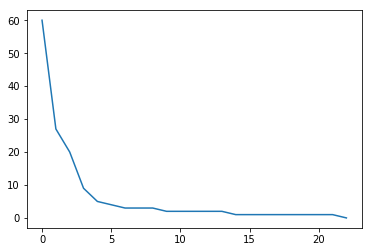

In [238]:
plt.plot(listError)
plt.show()